In [82]:
!pip install scikit-learn
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install biopandas
!!pip install scikeras

['Requirement already satisfied: scikeras in ./ai/lib/python3.10/site-packages (0.10.0)',
 'Requirement already satisfied: packaging>=0.21 in ./ai/lib/python3.10/site-packages (from scikeras) (23.0)',
 'Requirement already satisfied: scikit-learn>=1.0.0 in ./ai/lib/python3.10/site-packages (from scikeras) (1.2.1)',
 'Requirement already satisfied: scipy>=1.3.2 in ./ai/lib/python3.10/site-packages (from scikit-learn>=1.0.0->scikeras) (1.10.0)',
 'Requirement already satisfied: threadpoolctl>=2.0.0 in ./ai/lib/python3.10/site-packages (from scikit-learn>=1.0.0->scikeras) (3.1.0)',
 'Requirement already satisfied: numpy>=1.17.3 in ./ai/lib/python3.10/site-packages (from scikit-learn>=1.0.0->scikeras) (1.24.2)',
 'Requirement already satisfied: joblib>=1.1.1 in ./ai/lib/python3.10/site-packages (from scikit-learn>=1.0.0->scikeras) (1.2.0)']

In [83]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils, backend as K

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Output stabilisation
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "nlp"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()


In [84]:
import warnings
print("Warnings set")
warnings.filterwarnings("ignore")

Warnings set


In [85]:
nov_train_df = pd.read_csv("./novozymes-enzyme-stability-prediction/train.csv")
nov_train_update_df = pd.read_csv("./novozymes-enzyme-stability-prediction/train_updates_20220929.csv")
print("Description about the Data: ")
print("About the Original Data: ")
print(nov_train_df.describe())
print("About the updated Data: ")
print(nov_train_update_df.describe())
print("-------------------------")
print("Dimension of the data: ")
print("Dimension of Original Data: ")
print(nov_train_df.shape)
print("Dimension of Updated Data: ")
print(nov_train_update_df.shape)
print("-------------------------")
print("Head of Original data: ")
print(nov_train_df.head())
print("Head of the Updated data")
print(nov_train_update_df.head())

Description about the Data: 
About the Original Data: 
             seq_id            pH            tm
count  31390.000000  31104.000000  31390.000000
mean   15694.500000      6.892339     49.147337
std     9061.656811      1.612225     14.010089
min        0.000000      1.990000     -1.000000
25%     7847.250000      7.000000     42.100000
50%    15694.500000      7.000000     48.000000
75%    23541.750000      7.000000     53.800000
max    31389.000000     64.900000    130.000000
About the updated Data: 
             seq_id         pH  data_source         tm
count   2434.000000  25.000000          0.0  25.000000
mean   15094.721446   6.356000          NaN  50.904000
std     6360.236381   1.256012          NaN   5.541922
min       69.000000   2.700000          NaN  39.000000
25%    11024.250000   5.500000          NaN  48.400000
50%    16598.000000   7.000000          NaN  48.400000
75%    17660.750000   7.000000          NaN  55.600000
max    30742.000000   7.000000          NaN  64.

In [86]:
# Check for null values in original data
print(nov_train_df.isna().sum())

seq_id                 0
protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64


In [87]:
# Check for null values in the new data
print(nov_train_update_df.isna().sum())

seq_id                 0
protein_sequence    2409
pH                  2409
data_source         2434
tm                  2409
dtype: int64


In [88]:
# Memory consumption of the data
print("Memory consumption of the original data: ")
print(nov_train_df.info())
print("-------------------------")
print("Memory consumption of the updated data: ")
print(nov_train_update_df.info())
print("-------------------------")

Memory consumption of the original data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            31390 non-null  int64  
 1   protein_sequence  31390 non-null  object 
 2   pH                31104 non-null  float64
 3   data_source       28043 non-null  object 
 4   tm                31390 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB
None
-------------------------
Memory consumption of the updated data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq_id            2434 non-null   int64  
 1   protein_sequence  25 non-null     object 
 2   pH                25 non-null     float64
 3   data_source       0 non-null      float64

In [89]:
# Remove the seq id that is present in both the updated & original data
nov_train_df[~nov_train_df.loc[:,'seq_id'].isin(nov_train_update_df['seq_id'])]

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [90]:
# Defining the correlation between the attributes of the data
nov_train_df.corr()

,seq_id,pH,tm
seq_id,1.000000,-0.040164,0.008750
pH,-0.040164,1.000000,-0.044544
tm,0.008750,-0.044544,1.000000


In [91]:
nov_train_df.pH.value_counts()

7.00     26462
7.50       576
8.00       502
3.00       288
2.70       274
         ...  
3.14         1
2.53         1
2.81         1
39.00        1
10.30        1
Name: pH, Length: 115, dtype: int64

In [92]:
# Removing the null values from the pH attributes 
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
nov_train_df.pH = imp_mode.fit_transform(nov_train_df['pH'].values.reshape(-1,1))[:,0]

In [93]:
nov_train_df.isna().sum()

seq_id                 0
protein_sequence       0
pH                     0
data_source         3347
tm                     0
dtype: int64

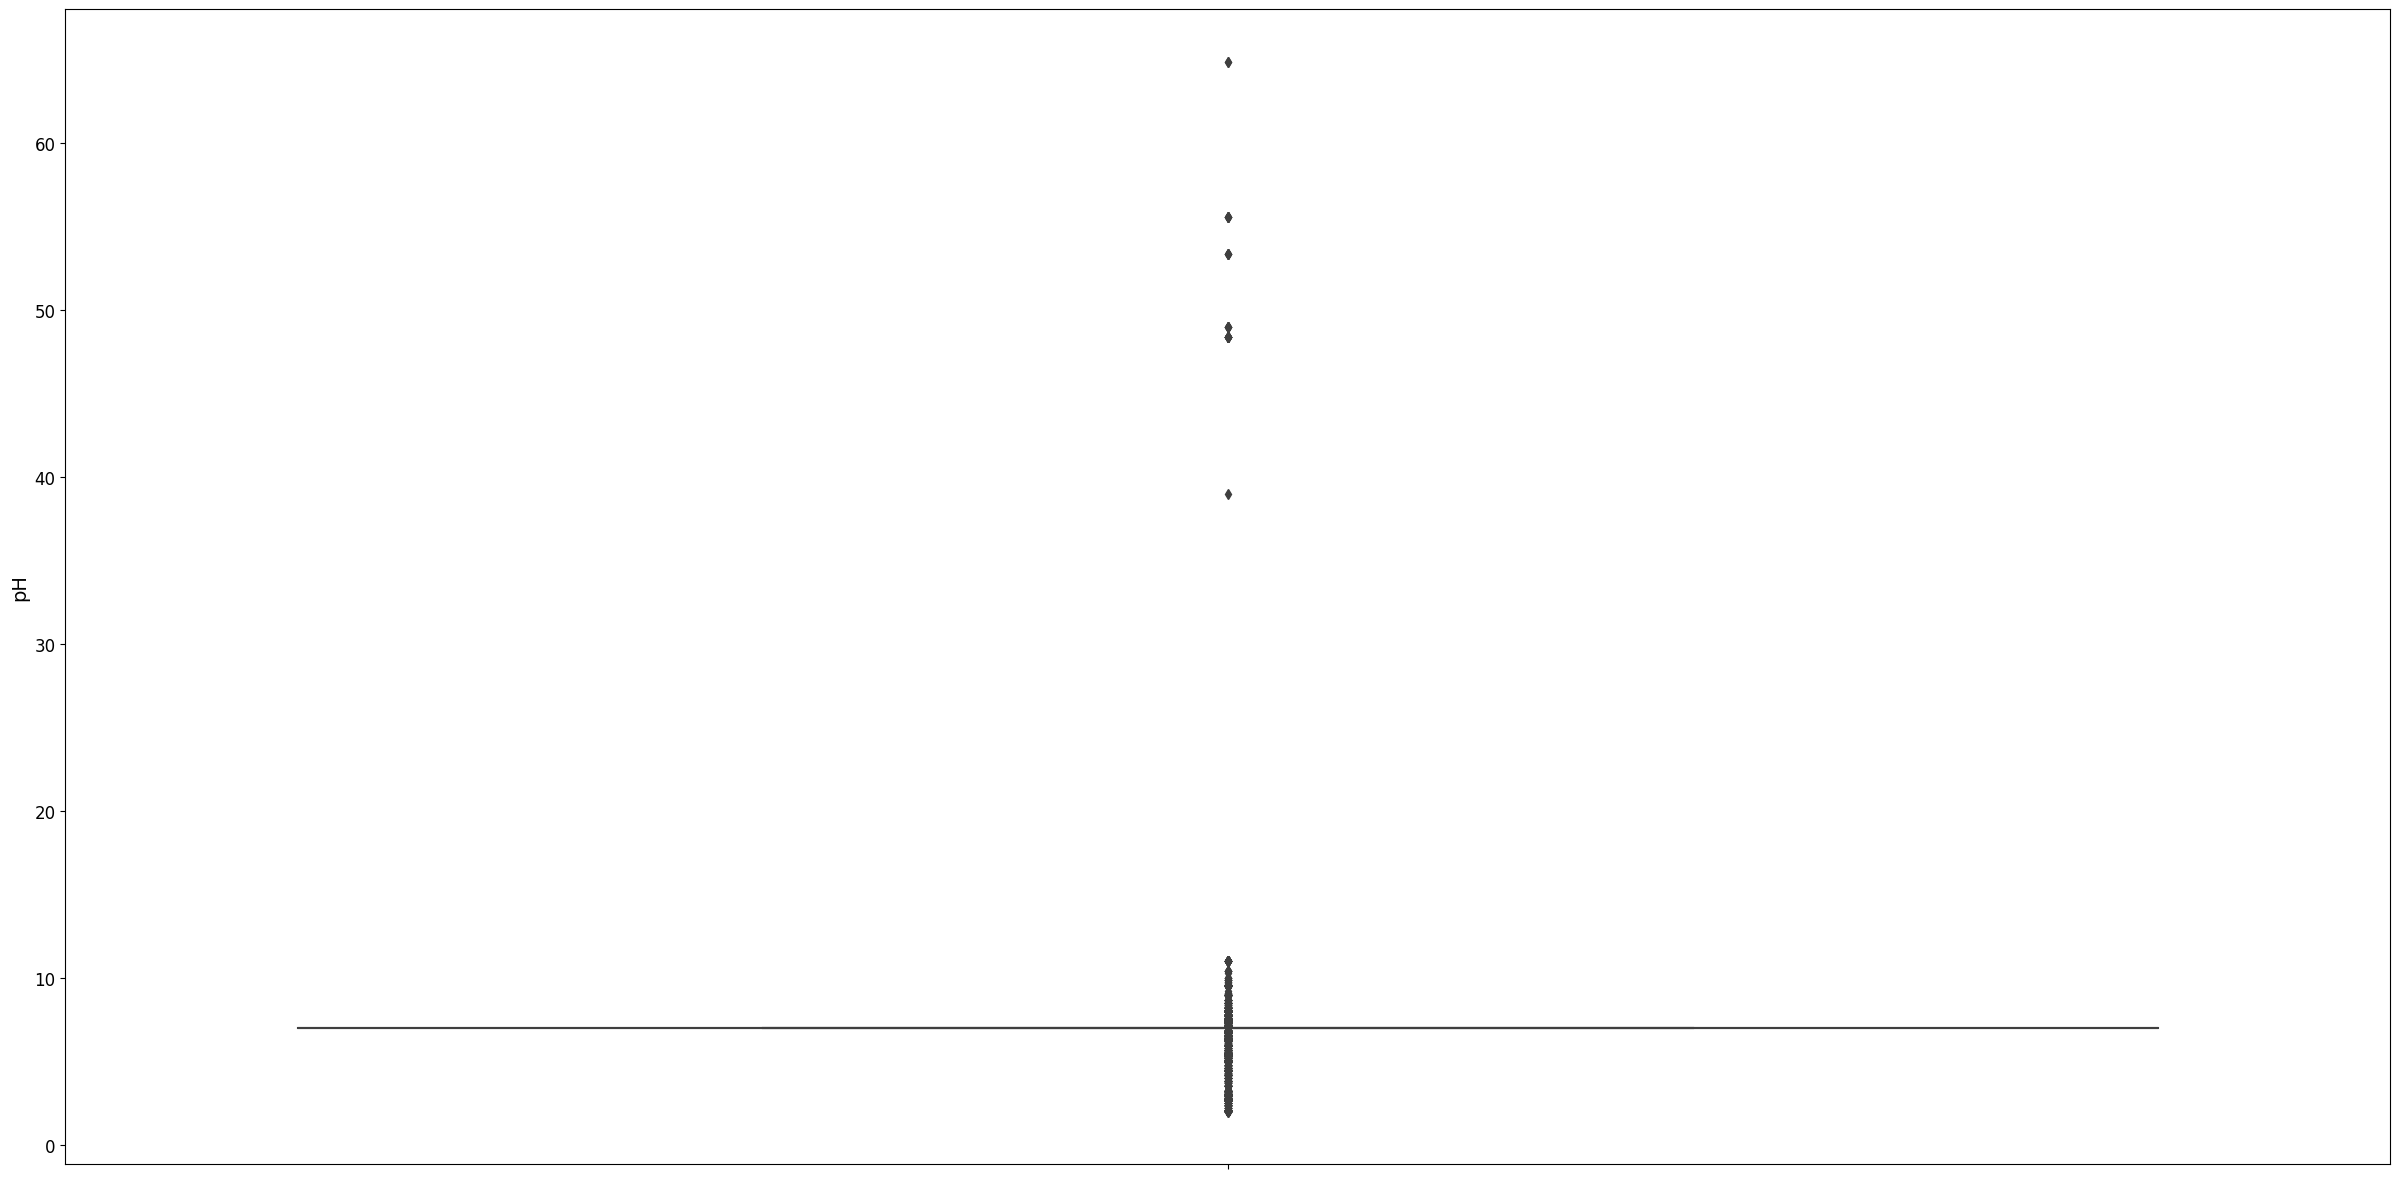

In [94]:
# Plotting to view the fit values 
sns.boxplot(y=nov_train_df["pH"])
plt.show()

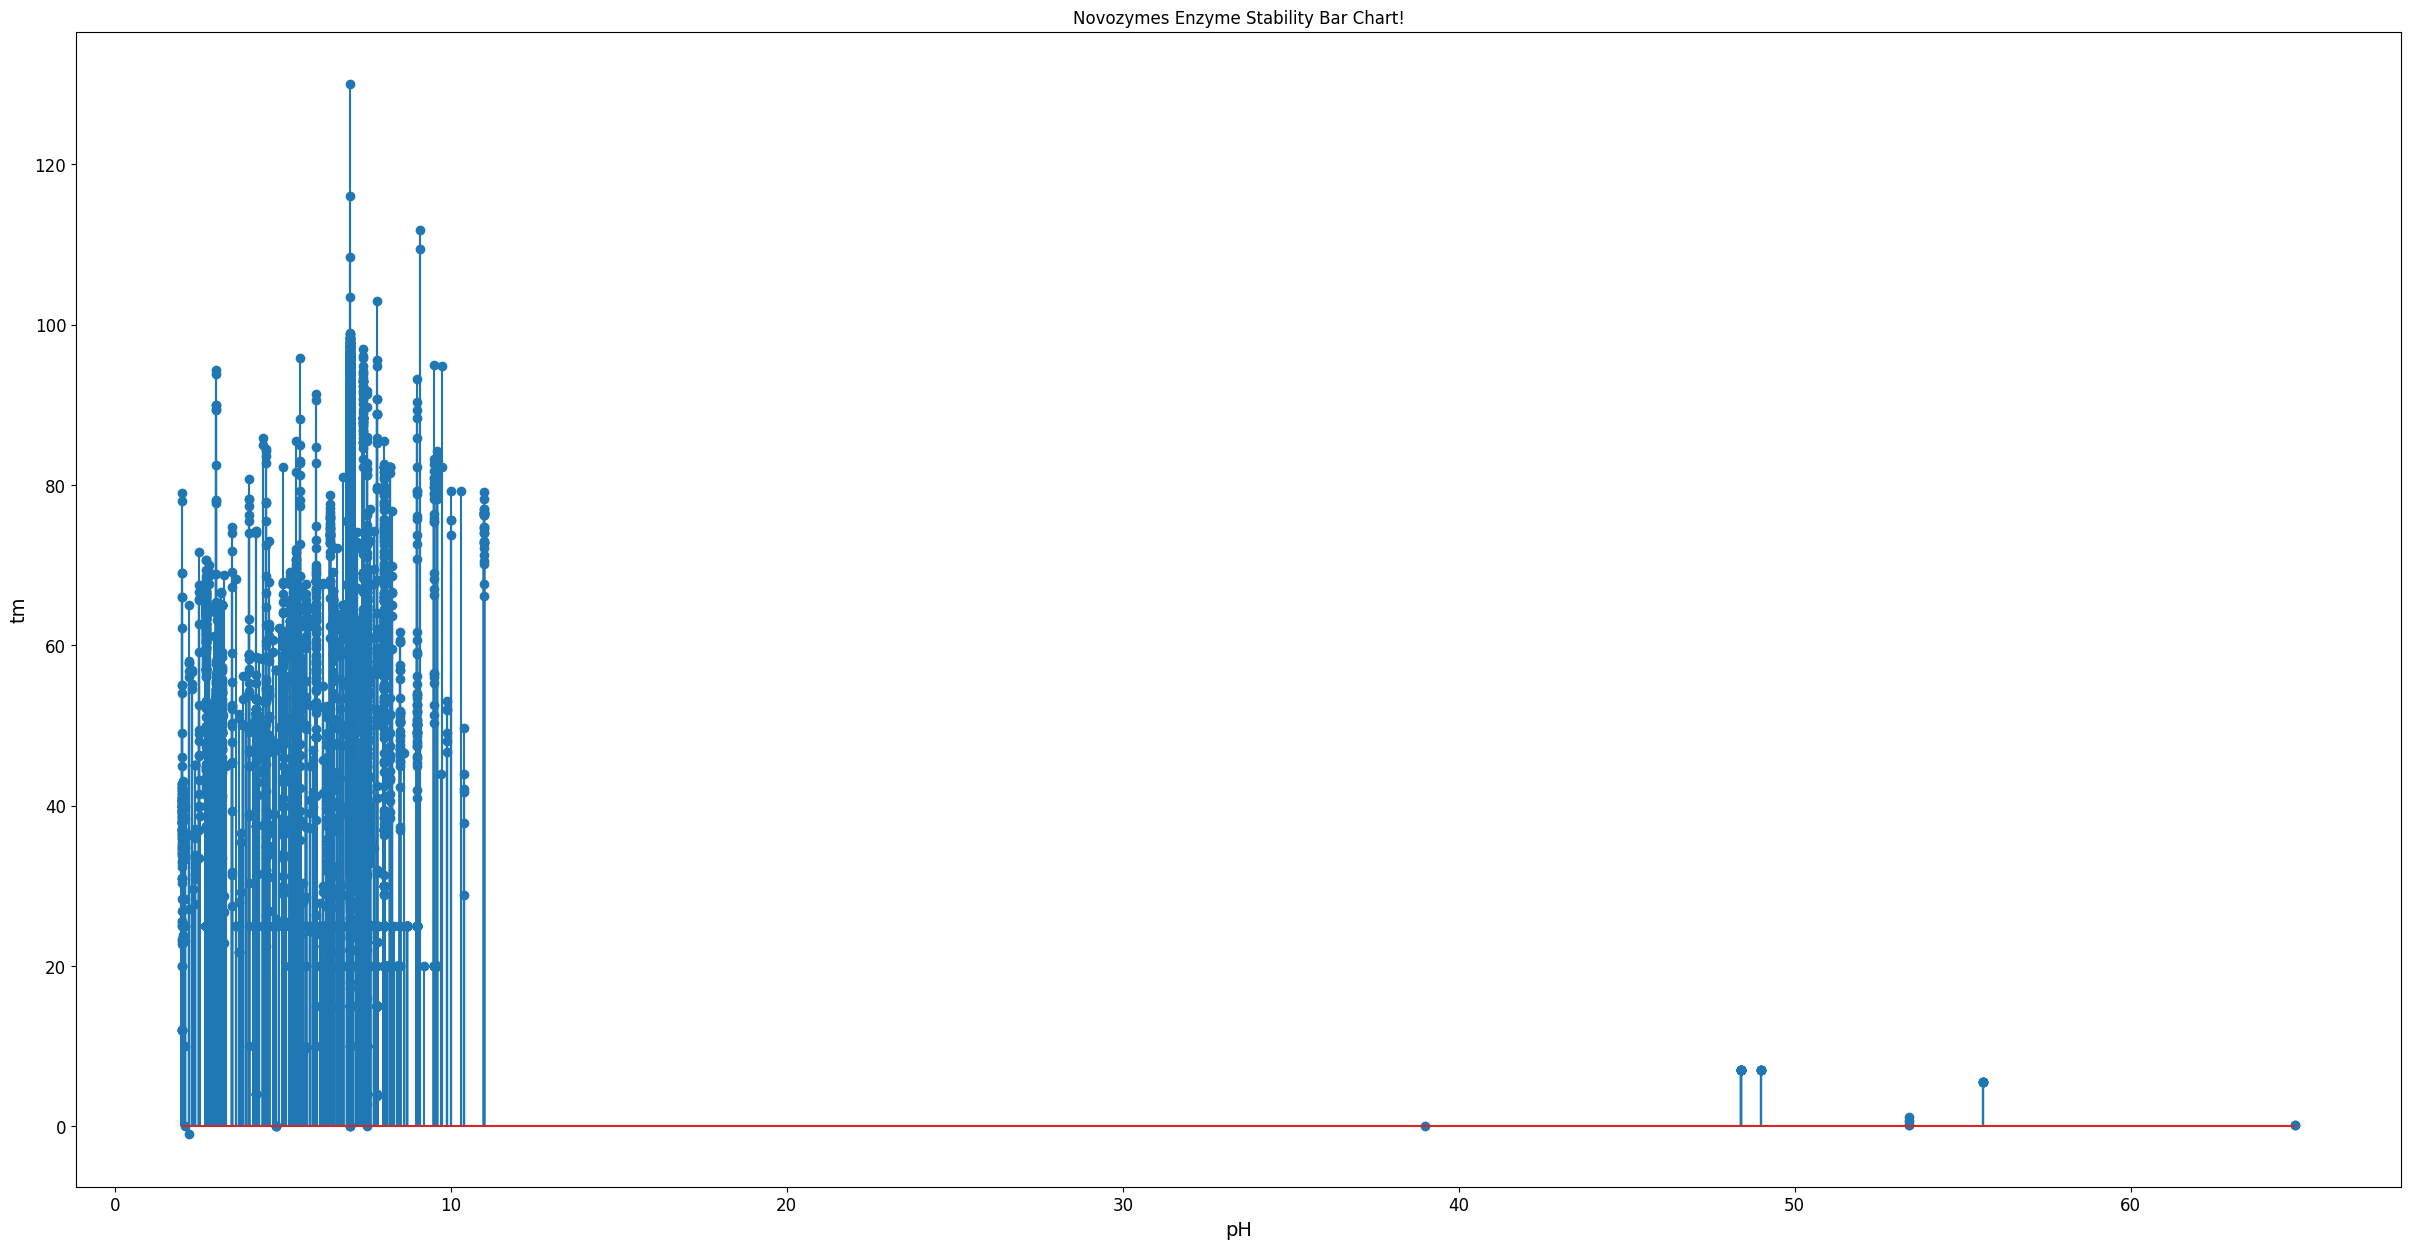

In [95]:
# Plotting to identify any outliers that may affect the training
for col in ['pH']:
    plt.stem(nov_train_df[col],nov_train_df['tm'])
    plt.rcParams['figure.figsize'] = (30, 15)
    plt.xlabel(col)
    plt.ylabel('tm')
    plt.title('Novozymes Enzyme Stability Bar Chart!')
    plt.show()

In [96]:
#Finding the outliers and removing them
print("Upper limit",nov_train_df['pH'].mean() + 3*nov_train_df['pH'].std())
print("Lower limit",nov_train_df['pH'].mean() - 3*nov_train_df['pH'].std())

Upper limit 11.708007034513498
Lower limit 2.0786332968022077


In [97]:
#nov_train_df = nov_train_df[(nov_train_df['pH'] < 11.708) & (nov_train_df['pH'] > 2.078)] to filter the outliers 
nov_train_df = nov_train_df[(nov_train_df['pH'] < 11.708) & (nov_train_df['pH'] > 2.078)]
nov_train_df

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [98]:
# Resetting the indexes
nov_train_df.reset_index()

,index,seq_id,protein_sequence,pH,data_source,tm
0,0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...,...
31237,31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31238,31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31239,31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31240,31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


In [99]:
# Removing the attributes that doesnt effectst the training
nov_train_df.drop(['seq_id','data_source'], axis=1,inplace=True)

In [100]:
# Installing biopandas for reading the PDB Data (Protein Database)
from biopandas.pdb import PandasPdb

In [101]:
nov_train_pdb =  PandasPdb().read_pdb("./novozymes-enzyme-stability-prediction/wildtype_structure_prediction_af2.pdb")
print('PDB Code: %s' % nov_train_pdb.code)
print('PDB Header Line: %s' % nov_train_pdb.header)
print('\nRaw PDB file contents:\n\n%s\n...' % nov_train_pdb.pdb_text[:1000])


PDB Code: 
PDB Header Line: Empty DataFrame
Columns: [record_name, entry, line_idx]
Index: []

Raw PDB file contents:

ATOM      1  N   VAL A   1      34.064  -6.456  50.464  1.00 45.11           N  
ATOM      2  H   VAL A   1      33.576  -6.009  51.228  1.00 45.11           H  
ATOM      3  H2  VAL A   1      33.882  -7.449  50.477  1.00 45.11           H  
ATOM      4  H3  VAL A   1      35.060  -6.323  50.566  1.00 45.11           H  
ATOM      5  CA  VAL A   1      33.643  -5.877  49.162  1.00 45.11           C  
ATOM      6  HA  VAL A   1      32.602  -6.130  48.959  1.00 45.11           H  
ATOM      7  C   VAL A   1      34.525  -6.533  48.112  1.00 45.11           C  
ATOM      8  CB  VAL A   1      33.798  -4.340  49.169  1.00 45.11           C  
ATOM      9  HB  VAL A   1      34.856  -4.086  49.236  1.00 45.11           H  
ATOM     10  O   VAL A   1      35.722  -6.569  48.382  1.00 45.11           O  
ATOM     11  CG1 VAL A   1      33.211  -3.674  47.923  1.00 45.11     

In [102]:
from sklearn import preprocessing

In [103]:
# Converting the chars to numbers
letnum = {}
alpbt = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
for i in range(1,53):
    letnum[alpbt[i-1]] = i
print(letnum)   


{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, 'A': 27, 'B': 28, 'C': 29, 'D': 30, 'E': 31, 'F': 32, 'G': 33, 'H': 34, 'I': 35, 'J': 36, 'K': 37, 'L': 38, 'M': 39, 'N': 40, 'O': 41, 'P': 42, 'Q': 43, 'R': 44, 'S': 45, 'T': 46, 'U': 47, 'V': 48, 'W': 49, 'X': 50, 'Y': 51, 'Z': 52}


In [104]:
# Splitting the dataset into the training data & the output 
nov_train_x = nov_train_df.drop('tm',axis=1)
nov_train_y = nov_train_df['tm']

In [105]:
# Splitting the data into test & train parts
from sklearn.model_selection import train_test_split
nov_x_train, nov_x_valid, nov_y_train, nov_y_valid = train_test_split(
    nov_train_x, nov_train_y, test_size=0.20, random_state=0)


In [106]:
import re
prtseqlen = []
for prt in nov_x_train['protein_sequence']:
    prtseqlen.append(len(prt))
nov_x_train['prtseqlen'] = prtseqlen
prtseqlen = []
for prt in nov_x_valid['protein_sequence']:
    prtseqlen.append(len(prt))
nov_x_valid['prtseqlen'] = prtseqlen
prtseqlen = []
prtseq_alp=['A', 'B','C', 'D', 'E', 'F', 'G', 'H', 'I','J', 'K', 'L', 'M', 'N','O', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X','Y','Z']
for alpha in prtseq_alp:
    nov_x_train[alpha]=nov_x_train['protein_sequence'].str.count(alpha,re.I)
    nov_x_valid[alpha]=nov_x_valid['protein_sequence'].str.count(alpha,re.I)
#Now drop the protien sequence column because we have all the information of this column into multiple columns
nov_x_train.drop(['protein_sequence'], axis=1,inplace=True) 
nov_x_valid.drop(['protein_sequence'], axis=1,inplace=True)  
print(nov_x_train.head())
print(nov_x_valid.head())


        pH  prtseqlen   A  B  C   D   E   F   G  H  ...   P   Q   R   S   T  \
19385  7.0        418  29  0  3  16  46  22  22  4  ...   5  22  17  30  22   
11951  7.0        257  24  0  0  22  17   5  18  3  ...   5  10  12  17  22   
17657  4.4        157  14  0  1   8   6   5  13  4  ...   3   4   7  15  13   
20369  7.0        246  24  0  0  16  17   6  15  4  ...  16   8  12  15   8   
29696  7.0        368  32  0  0  26  16   8  37  5  ...  11  17  12  31  25   

        V  W  X   Y  Z  
19385  21  5  0  13  0  
11951  12  1  0  16  0  
17657   7  4  0   7  0  
20369  16  5  0   9  0  
29696  42  9  0   9  0  

[5 rows x 27 columns]
        pH  prtseqlen   A  B   C   D   E   F   G  H  ...   P   Q   R   S   T  \
15531  7.0        362  50  0   5  15  29  14  28  3  ...  18   9  22  26  13   
27973  7.0        128   9  0   9   8  12   5   3  6  ...   6   5   8   3  10   
4823   7.0        537  64  0   9  31  34  19  57  8  ...  20  23  24  25  25   
66     7.0        415   9  0  12

<AxesSubplot: >

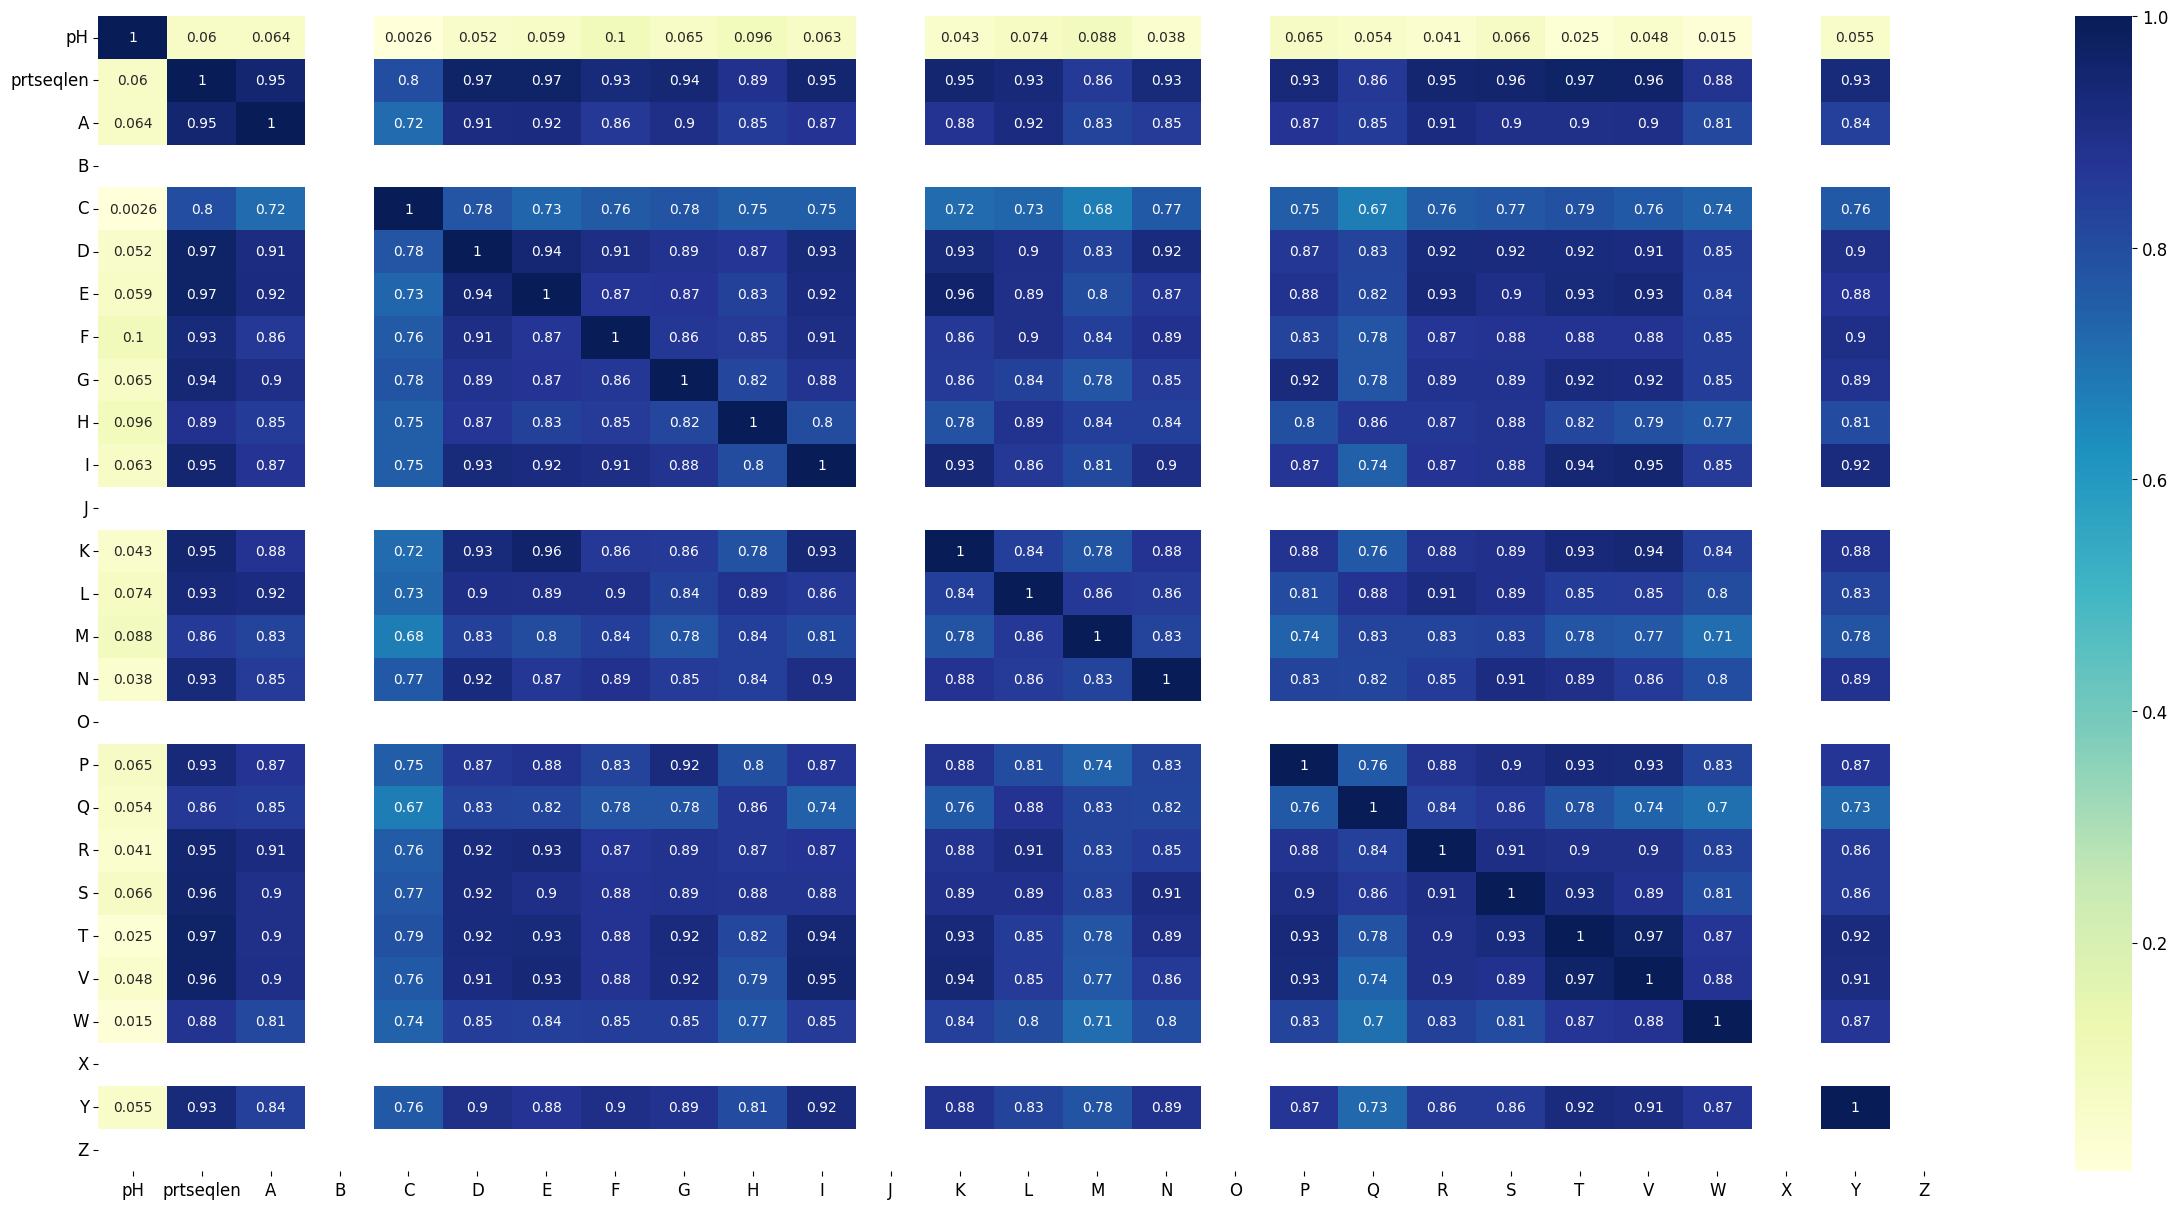

In [107]:
# Identifying the ptn sequence that doesnt depends upon any pH
sns.heatmap(nov_x_train.corr(), cmap="YlGnBu", annot=True)

In [108]:
# Removing those alphbets from the char map
nov_x_train = nov_x_train.drop(['B','J','O','X','Z'],axis=1)
nov_x_valid = nov_x_valid.drop(['B','J','O','X','Z'],axis=1)

In [109]:
# Clearing any previous sessions
keras.backend.clear_session()

In [110]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.001, momentum=0.9,clipnorm=1,clipvalue=0.5)

2023-03-20 21:03:59.656319: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-20 21:03:59.656575: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-20 21:03:59.656597: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hari-Inspiron-5590): /proc/driver/nvidia/version does not exist
2023-03-20 21:03:59.657459: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [111]:
model_basic = keras.models.Sequential()

In [112]:
model_basic.add(layers.Dense(units=500, input_dim=22, activation="relu"))
model_basic.add(layers.Dense(units=400, activation="relu"))
model_basic.add(layers.Dense(units=300, activation="relu"))
model_basic.add(layers.Dense(units=200, activation="relu"))
model_basic.add(layers.Dense(units=1, activation="linear"))

In [113]:
model_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               11500     
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 392,601
Trainable params: 392,601
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_basic.compile(optimizer='Rmsprop',loss='mean_squared_error', 
              metrics=['mse', 'mae'])

In [115]:
history_basic = model_basic.fit(nov_x_train, nov_y_train, epochs=100,batch_size=32,
                    validation_data=(nov_x_valid, nov_y_valid))

Epoch 1/100
782/782 [==============================] - 4s 4ms/step - loss: 897.6710 - mse: 897.6710 - mae: 20.5947 - val_loss: 1492.3674 - val_mse: 1492.3674 - val_mae: 27.4836
Epoch 2/100
782/782 [==============================] - 3s 4ms/step - loss: 327.9984 - mse: 327.9984 - mae: 12.4692 - val_loss: 621.2903 - val_mse: 621.2903 - val_mae: 22.2585
Epoch 3/100
782/782 [==============================] - 3s 4ms/step - loss: 238.5544 - mse: 238.5544 - mae: 10.9920 - val_loss: 332.1750 - val_mse: 332.1750 - val_mae: 11.5950
Epoch 4/100
782/782 [==============================] - 3s 4ms/step - loss: 227.7658 - mse: 227.7658 - mae: 10.3478 - val_loss: 254.8008 - val_mse: 254.8008 - val_mae: 11.5689
Epoch 5/100
782/782 [==============================] - 3s 4ms/step - loss: 192.9689 - mse: 192.9689 - mae: 9.8917 - val_loss: 255.9807 - val_mse: 255.9807 - val_mae: 11.8859
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 173.1342 - mse: 173.1342 - mae: 9.6479 - val_loss

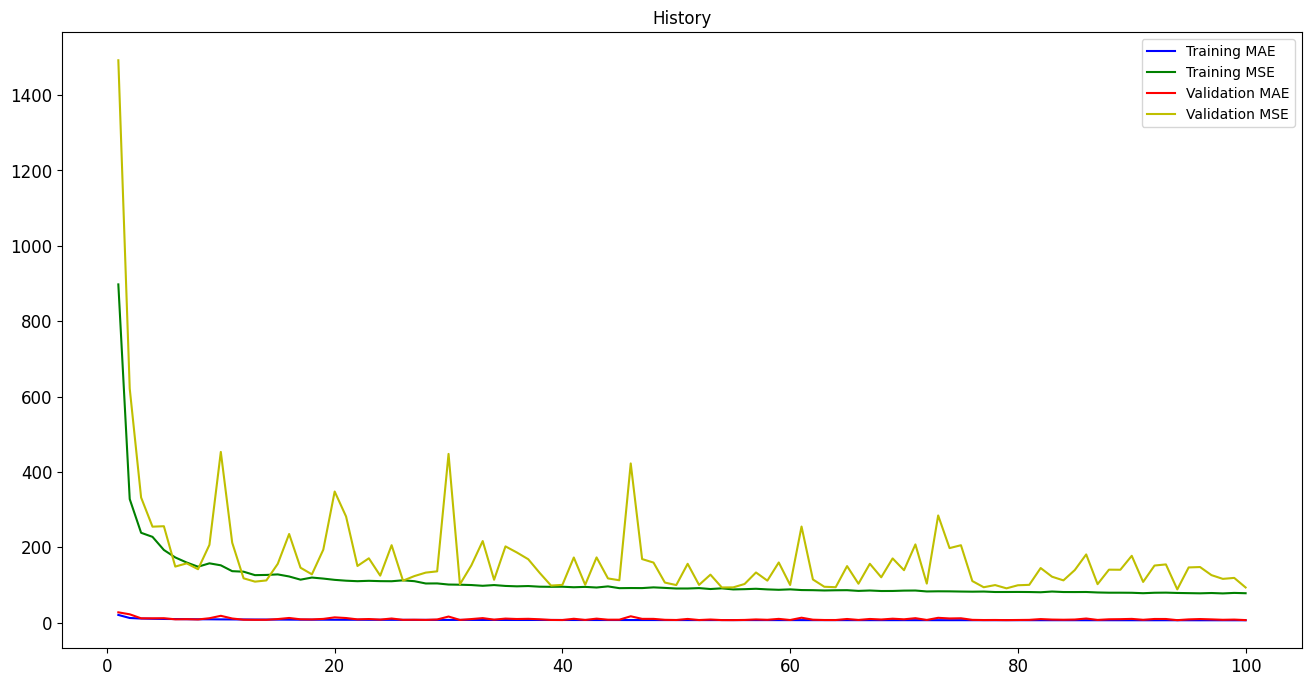

In [116]:
epochs_basic = range(1, len(history_basic.history["loss"]) + 1)

#let's define a figure with a wider width
plt.figure(figsize=(16,8))

#plot the training error
plt.plot(epochs_basic, history_basic.history["mae"], "b", label="Training MAE")
plt.plot(epochs_basic, history_basic.history["mse"], "g", label="Training MSE")
#together with validation error
plt.plot(epochs_basic, history_basic.history["val_mae"],"r", label="Validation MAE")
plt.plot(epochs_basic, history_basic.history["val_mse"],"y", label="Validation MSE")


#write some labels
plt.title("History")
plt.xlabel = "Epochs"
plt.ylabel = "Error"

#display the legend
plt.legend()

#show the plot
plt.show()


In [117]:
model_basic.save("my_model_basic.tf")

INFO:tensorflow:Assets written to: my_model_basic.tf/assets


INFO:tensorflow:Assets written to: my_model_basic.tf/assets


In [118]:
keras.backend.clear_session()

In [119]:
inputs = layers.Input(name="input", shape=(22,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=300, activation='relu',kernel_regularizer=keras.regularizers.l1())(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=200, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
h3 = layers.Dense(name="h3", units=100, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(0.01))(h2)
h3 = layers.Dropout(name="drop3", rate=0.2)(h3)
### layer output
outputs = layers.Dense(name="output", units=1, activation='linear')(h3)
model_dnn = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")
model_dnn.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22)]              0         
                                                                 
 h1 (Dense)                  (None, 300)               6900      
                                                                 
 drop1 (Dropout)             (None, 300)               0         
                                                                 
 h2 (Dense)                  (None, 200)               60200     
                                                                 
 drop2 (Dropout)             (None, 200)               0         
                                                                 
 h3 (Dense)                  (None, 100)               20100     
                                                                 
 drop3 (Dropout)             (None, 100)               0    

In [120]:
model_dnn.compile(optimizer='Rmsprop', loss='mean_squared_error', 
              metrics=['mse', 'mae'])
history_dnn = model_dnn.fit(nov_x_train, nov_y_train, epochs=100,batch_size=32,
                    validation_data=(nov_x_valid, nov_y_valid))


Epoch 1/100
782/782 [==============================] - 2s 2ms/step - loss: 996.0015 - mse: 983.9598 - mae: 20.5150 - val_loss: 2784.1594 - val_mse: 2775.7251 - val_mae: 33.8267
Epoch 2/100
782/782 [==============================] - 2s 2ms/step - loss: 385.4429 - mse: 377.8790 - mae: 13.6326 - val_loss: 611.2942 - val_mse: 604.1749 - val_mae: 21.6013
Epoch 3/100
782/782 [==============================] - 2s 2ms/step - loss: 327.2663 - mse: 320.2757 - mae: 12.3690 - val_loss: 343.2084 - val_mse: 336.3187 - val_mae: 13.4309
Epoch 4/100
782/782 [==============================] - 2s 2ms/step - loss: 283.0018 - mse: 276.1270 - mae: 11.8919 - val_loss: 204.9891 - val_mse: 198.1148 - val_mae: 10.4808
Epoch 5/100
782/782 [==============================] - 2s 2ms/step - loss: 264.3683 - mse: 257.4048 - mae: 11.5033 - val_loss: 181.2001 - val_mse: 174.1288 - val_mae: 9.6340
Epoch 6/100
782/782 [==============================] - 2s 2ms/step - loss: 237.6631 - mse: 230.5181 - mae: 11.4225 - val_los

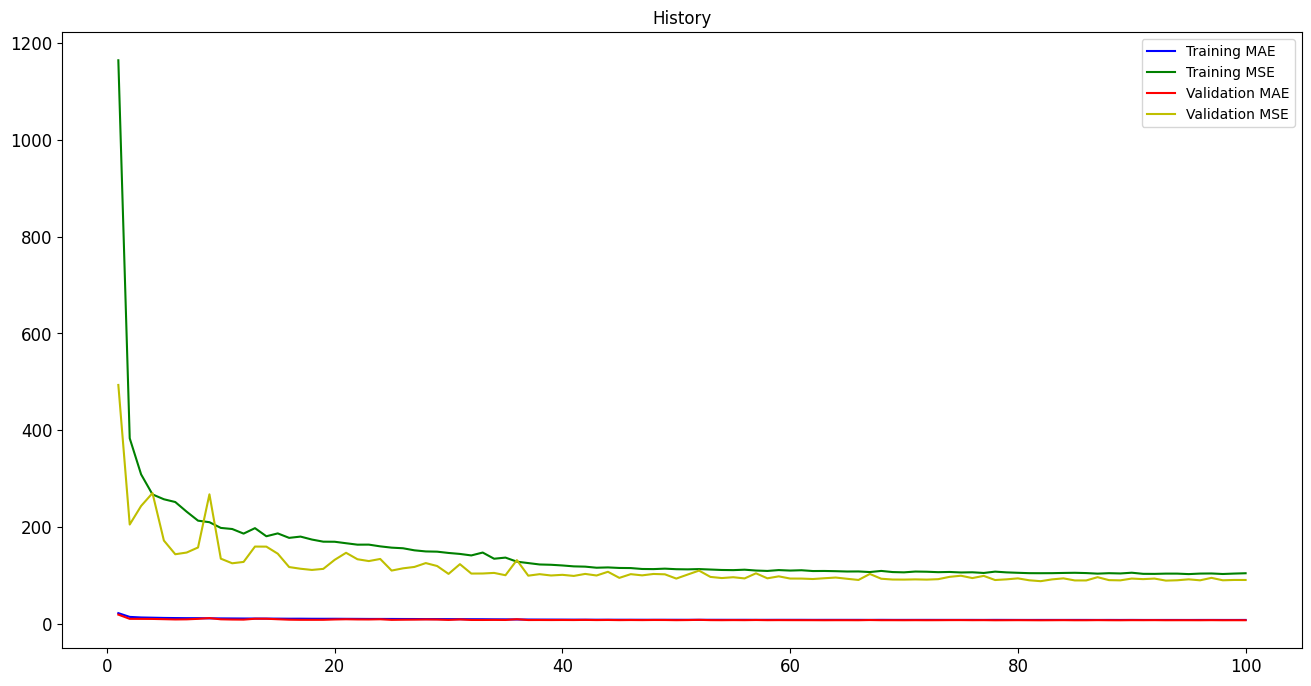

In [51]:
epochs_dnn = range(1, len(history_dnn.history["loss"]) + 1)

#let's define a figure with a wider width
plt.figure(figsize=(16,8))

#plot the training error
plt.plot(epochs_dnn, history_dnn.history["mae"], "b", label="Training MAE")
plt.plot(epochs_dnn, history_dnn.history["mse"], "g", label="Training MSE")
#together with validation error
plt.plot(epochs_dnn, history_dnn.history["val_mae"],"r", label="Validation MAE")
plt.plot(epochs_dnn, history_dnn.history["val_mse"],"y", label="Validation MSE")

#write some labels
plt.title("History")
plt.xlabel = "Epochs"
plt.ylabel = "Error"

#display the legend
plt.legend()

#show the plot
plt.show()

In [38]:
model_dnn.save("my_model_dnn.tf")

INFO:tensorflow:Assets written to: my_model_dnn.tf/assets


INFO:tensorflow:Assets written to: my_model_dnn.tf/assets


In [41]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
model_xgbr = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=300)
model_xgbr.fit(nov_x_train, nov_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
from sklearn.metrics import mean_absolute_error
nov_y_pred = model_xgbr.predict(nov_x_valid)
print("Mean Absolute error on Val data is:{}".format(mean_absolute_error(nov_y_valid, nov_y_pred)))

Mean Absolute error on Val data is:6.162831810994257


In [53]:
nov_test_df = pd.read_csv("./novozymes-enzyme-stability-prediction/test.csv")
print(nov_test_df.describe())
print(nov_test_df.head())

             seq_id      pH
count   2413.000000  2413.0
mean   32596.000000     8.0
std      696.717422     0.0
min    31390.000000     8.0
25%    31993.000000     8.0
50%    32596.000000     8.0
75%    33199.000000     8.0
max    33802.000000     8.0
   seq_id                                   protein_sequence  pH data_source
0   31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes
1   31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes
2   31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8   Novozymes
3   31393  VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes
4   31394  VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes


In [54]:
print(nov_test_df.isna().sum())

seq_id              0
protein_sequence    0
pH                  0
data_source         0
dtype: int64


In [55]:
nov_test_df[~nov_test_df.loc[:,'seq_id'].isin(nov_train_update_df['seq_id'])]

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [56]:
prtseqlen = []
for prt in nov_test_df['protein_sequence']:
    prtseqlen.append(len(prt))
nov_test_df['prtseqlen'] = prtseqlen
prtseq_alp=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
for alpha in prtseq_alp:
    nov_test_df[alpha]=nov_test_df['protein_sequence'].str.count(alpha,re.I)
#Now drop the protien sequence column
nov_test_df.drop(['protein_sequence'], axis=1,inplace=True) 
print(nov_test_df.head())


   seq_id  pH data_source  prtseqlen   A  C   D  E   F   G  ...  M   N   P  \
0   31390   8   Novozymes        221  22  4  15  8  10  19  ...  0  19  17   
1   31391   8   Novozymes        221  22  4  15  7  10  19  ...  0  19  17   
2   31392   8   Novozymes        220  22  4  15  7  10  19  ...  0  19  17   
3   31393   8   Novozymes        221  22  5  15  7  10  19  ...  0  19  17   
4   31394   8   Novozymes        221  22  4  15  7  11  19  ...  0  19  17   

    Q  R   S  T   V  W  Y  
0  13  3  18  8  13  6  6  
1  13  3  18  8  13  6  6  
2  13  3  18  8  13  6  6  
3  13  3  18  8  13  6  6  
4  13  3  18  8  13  6  6  

[5 rows x 24 columns]


In [57]:
nov_test_df.drop(['data_source'], axis=1,inplace=True) 

In [58]:
nov_test_seq = nov_test_df['seq_id']
nov_test_df.drop('seq_id',axis=1,inplace=True)


In [59]:
nov_test_pred_xgbr = pd.DataFrame(model_xgbr.predict(nov_test_df))
nov_test_pred_xgbr.columns=['tm']
nov_test_pred_xgbr['seq_id'] = nov_test_seq
nov_test_pred_xgbr=nov_test_pred_xgbr.reindex(columns=['seq_id','tm'])
print(nov_test_pred_xgbr.head())
nov_test_pred_xgbr.to_csv('submissions.csv',index=False)

   seq_id         tm
0   31390  46.151100
1   31391  46.726959
2   31392  46.151100
3   31393  47.143764
4   31394  46.879353


In [60]:
 # Main Code from https://www.kaggle.com/code/nirmalkondreddy/novozyme-enzyme-prediction-using-xgb-and-nn